Comenzamos cargando todas las librerías necesarias para empezar el proyecto.

In [81]:
#load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

En primer instancia cargamos el archivo que se nos proporcionó como .xlsx para analizarlo y luego usarlo como entrenamiento de nuestro modelo de machine learning.

In [82]:
df = pd.read_excel("E-Commerce_train.xlsx")
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8994,8995,D,Ship,3,1,217,3,low,F,1,4177,1
8995,8996,F,Ship,5,3,232,3,medium,M,3,4526,0
8996,8997,A,Ship,4,5,260,3,medium,F,6,4221,0
8997,8998,B,Ship,4,2,184,3,medium,F,5,5931,1


Vamos analizando de a poco los datos que se nos proporcionó, la información en general. En este caso su .shape y propiamente su .info.

In [83]:
df.shape

(8999, 12)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   8999 non-null   int64 
 1   Warehouse_block      8999 non-null   object
 2   Mode_of_Shipment     8999 non-null   object
 3   Customer_care_calls  8999 non-null   int64 
 4   Customer_rating      8999 non-null   int64 
 5   Cost_of_the_Product  8999 non-null   int64 
 6   Prior_purchases      8999 non-null   int64 
 7   Product_importance   8999 non-null   object
 8   Gender               8999 non-null   object
 9   Discount_offered     8999 non-null   int64 
 10  Weight_in_gms        8999 non-null   int64 
 11  Reached.on.Time_Y.N  8999 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 843.8+ KB


También nos fijamos si acaso el dataset tiene valores nulos...

In [85]:

df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

Con esta descripción del df veremos que particularmente la MEDIA de entregas puntuales es del 63%

In [86]:
df.describe()
#mean de entregas a tiempo del 63%

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,8999.00000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000
mean,4500.00000,4.015113,2.994999,208.561507,3.511501,15.097678,3584.364596,0.635515
std,2597.93187,1.138934,1.413143,48.289172,1.532074,17.400040,1614.750194,0.481312
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2250.50000,3.000000,2.000000,168.000000,3.000000,4.000000,1857.000000,0.000000
50%,4500.00000,4.000000,3.000000,211.000000,3.000000,8.000000,4046.000000,1.000000
75%,6749.50000,5.000000,4.000000,249.500000,4.000000,19.000000,4999.500000,1.000000
max,8999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [87]:
variable_analizable = df["Reached.on.Time_Y.N"].unique()
variable_analizable

array([1, 0], dtype=int64)

De forma gráfica obsevamos los porcentajes en que los productos llegan o no a tiempo.

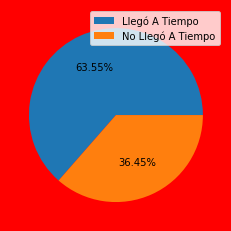

In [88]:
from tkinter.font import names


fig, ax = plt.subplots()
ax.set_facecolor("black")
ax.pie(df["Reached.on.Time_Y.N"].value_counts(),autopct="%2.2f%%")
fig.set_facecolor("red")
plt.legend(["Llegó A Tiempo", "No Llegó A Tiempo"])
plt.show()



Vamos a ver la correlación entre variables usando la matriz de confusión.

<AxesSubplot:>

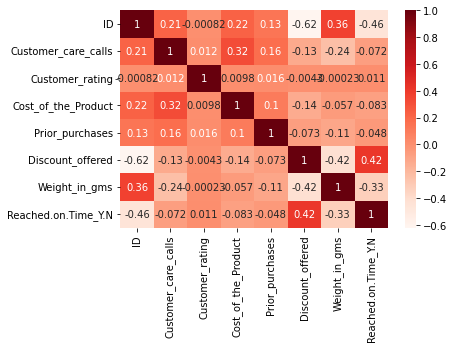

In [89]:
#mapa de calor
correlacion_variables = df.corr()
sns.heatmap(correlacion_variables, cmap="Reds", annot=True)


Procedemos a droppear las variables que no consideraremos.

In [90]:
df.drop(["Discount_offered"], axis=1, inplace=True)
df.drop(["Customer_care_calls"], axis=1, inplace=True)
df.drop(["Weight_in_gms"], axis=1, inplace=True)
df.drop(["ID"], axis=1, inplace=True)



Para volver a ver la matriz de confusión.

<AxesSubplot:>

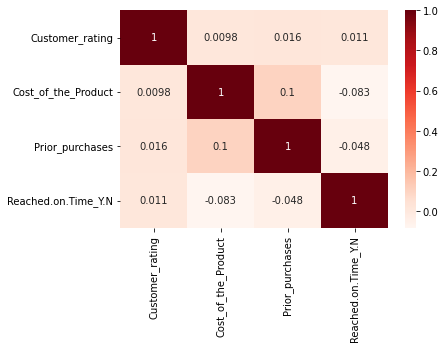

In [91]:
correlacion_variables = df.corr()
sns.heatmap(correlacion_variables, cmap="Reds", annot=True)

Test del Chi^2 a las variables categóricas.

In [92]:
tablaa = pd.crosstab(df["Warehouse_block"], df["Reached.on.Time_Y.N"])
resultados_chi = chi2_contingency(tablaa)
print("p-value ", resultados_chi[1])

p-value  0.9071521437355561


In [93]:
cross_shipment = pd.crosstab(df["Mode_of_Shipment"], df["Reached.on.Time_Y.N"])
resultado_shipment = chi2_contingency(cross_shipment)
print("p-value ", resultado_shipment[1])


p-value  0.2568899601964812


In [94]:
cross_producto = pd.crosstab(df["Product_importance"], df["Reached.on.Time_Y.N"])
resultado_producto = chi2_contingency(cross_producto)
print("p-value ",resultado_producto)


p-value  (3.477511508979701, 0.175738927009453, 2, array([[ 303.61595733,  529.38404267],
       [1570.20113346, 2737.79886654],
       [1406.18290921, 2451.81709079]]))


In [95]:
cross_genero = pd.crosstab(df["Gender"], df["Reached.on.Time_Y.N"])
resultado_genero = chi2_contingency(cross_genero)
print("p-value ",resultado_genero[1])

p-value  0.8015181812471062


In [96]:
df.drop(["Warehouse_block", "Mode_of_Shipment", "Gender"], axis=1, inplace=True)
df.drop(["Product_importance"], axis=1, inplace=True)

Variables categóricas y Variables Independientes.

In [97]:
x = df.drop(["Reached.on.Time_Y.N"], axis=1)
y = df["Reached.on.Time_Y.N"]

x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Customer_rating      8999 non-null   int64
 1   Cost_of_the_Product  8999 non-null   int64
 2   Prior_purchases      8999 non-null   int64
dtypes: int64(3)
memory usage: 211.0 KB


La parte en que separamos la parte de entrenamiento de la de prueba del modelo.

In [98]:
#separar datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

Se decidió usar REGRESIÓN LOGÍSTICA. Es similar a la regresión lineal, excepto que en lugar de un resultado gráfico, la variable objetivo es binaria; el valor es 1 o 0.

In [99]:
minimoescalar = MinMaxScaler()
X_train= minimoescalar.fit_transform(X_train)
X_test = minimoescalar.fit_transform(X_test)

In [100]:
#Regresión Escalar Activada
from sklearn.linear_model import LogisticRegression
modelo = LogisticRegression()
modelo.fit(x,y)


LogisticRegression()

Los modelos tienen los siguientes scores:

In [101]:
from sklearn.metrics import accuracy_score

#Hora do Predecir!
y_pred = modelo.predict(x)

print("EL SCORE ES DE:", accuracy_score(y, y_pred))



EL SCORE ES DE: 0.6352928103122569


In [102]:
from sklearn.metrics import recall_score
print("EL SCORE ES:", recall_score(y, y_pred))

EL SCORE ES: 0.9986011540479105


Procedemos a cargar el los datos de prueba que también estaban en .xlsx

In [103]:
#data set de prueba
dfprueba = pd.read_excel("E-Commerce_test.xlsx")
dfprueba

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,9000,F,Ship,5,1,189,2,medium,M,10,5248
1,9001,D,Ship,5,3,150,2,high,F,9,4446
2,9002,F,Ship,3,3,200,3,low,M,3,5739
3,9003,A,Ship,5,1,133,2,medium,M,1,4643
4,9004,B,Ship,4,2,260,3,low,M,4,5504
...,...,...,...,...,...,...,...,...,...,...,...
1995,10995,A,Ship,4,1,252,5,medium,F,1,1538
1996,10996,B,Ship,4,1,232,5,medium,F,6,1247
1997,10997,C,Ship,5,4,242,5,low,F,4,1155
1998,10998,F,Ship,5,2,223,6,medium,M,2,1210


Descartamos columnas para quedarnos con las variables independientes.

In [104]:
dfprueba.drop(["Discount_offered"], axis=1, inplace=True)
dfprueba.drop(["Customer_care_calls"], axis=1, inplace=True)
dfprueba.drop(["Weight_in_gms"], axis=1, inplace=True)
dfprueba.drop(["ID"], axis=1, inplace=True)
dfprueba.drop(["Warehouse_block"], axis=1, inplace=True)
dfprueba.drop(["Product_importance"], axis=1, inplace=True)
dfprueba.drop(["Gender"], axis=1, inplace=True)
dfprueba.drop(["Mode_of_Shipment"], axis=1, inplace=True)

Comenzamos con la predicción.

In [105]:
prediction = modelo.predict(dfprueba)


Y creamos el archivo csv para su futuro upload al git.

In [109]:
angel21985 = pd.DataFrame(prediction)

angel21985 =pd.DataFrame(prediction, columns=["Prediccion"])
angel21985


,Prediccion
0,1
1,1
2,1
3,1
4,1
...,...
1995,1
1996,1
1997,1
1998,1


DATOS EXPORTADOS

In [110]:
angel21985.to_csv('angel21985.csv',index=False) #Exportamos los resultados